In [547]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [548]:
# Load the bear attack dataset
bear_data = pd.read_csv("C:/Users/georg/git repositories/project 3 group 2/project-3-group-2/eda/Resources/bear_attacks.csv")
# Load the shark attack dataset
shark_data = pd.read_excel("C:/Users/georg/git repositories/project 3 group 2/project-3-group-2/eda/Resources/GSAF5-1.xls")

In [549]:
# Remove spaces from column headers and replace with underscores
shark_data.columns = shark_data.columns.str.replace(' ' ,'')

# Display updated column names
print(shark_data.columns)

Index(['CaseNumber', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal(Y/N)', 'Time',
       'Species', 'InvestigatororSource', 'pdf', 'hrefformula', 'href',
       'CaseNumber.1', 'CaseNumber.2', 'originalorder', 'Unnamed:22',
       'Unnamed:23'],
      dtype='object')


In [550]:
# Verify the original values
distinct_values = shark_data['Date'].unique()
print(distinct_values)

['27-Aug-2019' '21-Aug-2019' '20-Aug-2019' ... 'Reported 08-Jan-2017'
 'Reported 19-Aug-1836' nan]


In [551]:
# Verify the original values
distinct_values = shark_data['Fatal(Y/N)'].unique()
print(distinct_values)

['N' nan 'Y' 'M' 'UNKNOWN' 2017 'Y x 2' ' N' 'N ' 'y']


In [552]:
# Define mapping for Fatal(Y/N) values
def standardize_fatal(value):
    value = str(value).strip().upper()
    if value in ['Y', 'YES', 'Y X 2']:
        return 'Y'
    elif value in ['N', 'NO', 'N ']:
        return 'N'
    else:
        return np.nan

# Apply the function to the 'Fatal(Y/N)' column
shark_data['Fatal(Y/N)'] = shark_data['Fatal(Y/N)'].apply(standardize_fatal)

# Verify the updated values
distinct_values = shark_data['Fatal(Y/N)'].unique()
print(distinct_values)


['N' nan 'Y']


In [553]:
# Replace 'Reported' with an empty string in the 'Date' column
shark_data['Date'] = shark_data['Date'].str.replace('Reported ', '', regex=False)

# Convert 'Date' to datetime
shark_data['Date'] = pd.to_datetime(shark_data['Date'], errors='coerce', format='%d-%b-%Y')

# Optionally, print the distinct values after cleaning
distinct_values = shark_data['Date'].unique()
print(distinct_values)

<DatetimeArray>
['2019-08-27 00:00:00', '2019-08-21 00:00:00', '2019-08-20 00:00:00',
 '2019-08-16 00:00:00', '2019-08-11 00:00:00', '2019-08-04 00:00:00',
 '2019-08-03 00:00:00', '2019-07-30 00:00:00', '2019-07-29 00:00:00',
 '2019-07-28 00:00:00',
 ...
 '1783-03-02 00:00:00', '1780-08-08 00:00:00', '1771-07-12 00:00:00',
 '1753-10-27 00:00:00', '1751-07-27 00:00:00', '1742-12-17 00:00:00',
 '1738-04-06 00:00:00', '1703-03-26 00:00:00', '2017-01-08 00:00:00',
 '1836-08-19 00:00:00']
Length: 4738, dtype: datetime64[ns]


In [554]:
# Verify the original values
distinct_values = shark_data['Year'].unique()
print(distinct_values)

[2019. 2018. 2017. 2016. 2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008.
 2007. 2006. 2005. 2004. 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996.
 1995. 1994. 1993. 1992. 1991. 1990. 1989. 1988. 1987. 1986. 1985. 1984.
 1983. 1982. 1981. 1980. 1979. 1978. 1977. 1976. 1975. 1974. 1973. 1972.
 1971. 1970. 1969. 1968. 1967. 1966. 1965. 1964. 1963. 1962. 1961. 1960.
 1959. 1958. 1957. 1956. 1955. 1954. 1953. 1952. 1951. 1950. 1949. 1948.
 1947. 1946. 1945. 1944. 1943. 1942. 1941. 1940. 1939. 1938. 1937. 1936.
 1935. 1934. 1933. 1932. 1931. 1930. 1929. 1928. 1927. 1926. 1925. 1924.
 1923. 1922. 1921. 1920. 1919. 1918. 1917. 1916. 1915. 1914. 1913. 1912.
 1911. 1910. 1909. 1908. 1907. 1906. 1905. 1904. 1903. 1902. 1901. 1900.
 1899. 1898. 1897. 1896. 1895. 1894. 1893. 1892. 1891. 1890. 1889. 1888.
 1887. 1886. 1885. 1884. 1883. 1882. 1881. 1880. 1879. 1878. 1877. 1876.
 1875. 1874. 1873. 1872. 1871. 1870. 1869. 1868. 1867. 1866. 1865. 1864.
 1863. 1862. 1861. 1860. 1859. 1858. 1857. 1856. 18

In [555]:
# Convert 'Year' to numeric, setting errors='coerce' to handle non-numeric values
shark_data['Year'] = pd.to_numeric(shark_data['Year'], errors='coerce')

# Define valid range for years
valid_year_range = (1900, 2023)  # You can adjust the range as needed

# Filter out invalid years outside the valid range
shark_data['Year'] = shark_data['Year'].apply(lambda x: x if (pd.notnull(x) and valid_year_range[0] <= x <= valid_year_range[1]) else np.nan)

# Print the distinct values after cleaning
distinct_values = shark_data['Year'].unique()
print(distinct_values)

[2019. 2018. 2017. 2016. 2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008.
 2007. 2006. 2005. 2004. 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996.
 1995. 1994. 1993. 1992. 1991. 1990. 1989. 1988. 1987. 1986. 1985. 1984.
 1983. 1982. 1981. 1980. 1979. 1978. 1977. 1976. 1975. 1974. 1973. 1972.
 1971. 1970. 1969. 1968. 1967. 1966. 1965. 1964. 1963. 1962. 1961. 1960.
 1959. 1958. 1957. 1956. 1955. 1954. 1953. 1952. 1951. 1950. 1949. 1948.
 1947. 1946. 1945. 1944. 1943. 1942. 1941. 1940. 1939. 1938. 1937. 1936.
 1935. 1934. 1933. 1932. 1931. 1930. 1929. 1928. 1927. 1926. 1925. 1924.
 1923. 1922. 1921. 1920. 1919. 1918. 1917. 1916. 1915. 1914. 1913. 1912.
 1911. 1910. 1909. 1908. 1907. 1906. 1905. 1904. 1903. 1902. 1901. 1900.
   nan]


In [556]:
# Verify the original values
distinct_values = shark_data['Age'].unique()
print(distinct_values)

[40 11 26 9 16 51 21 20 37 nan 18 49 23 45 "20's" 43 32 50 8 64 19 17 65
 10 67 53 28 12 25 58 74 46 41 31 15 '9 & 60' 35 48 24 36 '20s' 42 33 29
 55 13 39 '60s' 14 56 61 'a minor' 6 62 30 57 52 34 60 54 69 38 '40s' 22 7
 3 82 73 68 'Teen' 47 66 72 59 27 71 44 '38' '39' '23' '32' '52' '68' '12'
 '18' '19' '43' '47' '6' '37' '9' '36' '10' '16' '13' '11' '17' '14' '30'
 '50' '29' '65' '63' '26' '71' '48' '70' '58' '18 months' '22' '41' '35'
 '57' '20' '24' '34' '15' '44' '53' '7' '40' '28' '33' '30s' '31' '45'
 '50s' '8' '51' '61' '42' '25' 'teen' '66' '21' '77' '46' '60' '74' '55'
 '27' '3' '56' '64' '28 & 26' '62' '5' '49' '54' '86' '59' '18 or 20'
 '12 or 13' '46 & 34' '28, 23 & 30' 'Teens' 77 63 '36 & 26' '8 or 10' 84
 '\xa0 ' ' ' '30 or 36' '6½' '21 & ?' 75 '33 or 37' 'mid-30s' '23 & 20' 5
 ' 30' '7      &    31' ' 28' '20?' "60's" '69' '32 & 30' '16 to 18' '87'
 '67' 'Elderly' 'mid-20s' 'Ca. 33' '74 ' '45 ' '21 or 26' '20 ' '>50'
 '18 to 22' 'adult' '9 & 12' '? & 19' '9 months' '25

In [557]:
# Function to convert values to numeric, replacing invalid ones with NaN
def convert_to_numeric(value):
    try:
        # Convert value to numeric, if possible
        return pd.to_numeric(value, errors='coerce')
    except (ValueError, TypeError):
        return np.nan

# Apply the function to the 'Age' column
shark_data['Age'] = shark_data['Age'].apply(convert_to_numeric)

# Print the number of NaN values in the 'Age' column to verify
print(f"Number of NaN values in 'Age': {shark_data['Age'].isna().sum()}")

# Verify the original values
distinct_values = shark_data['Age'].unique()
print(distinct_values)


Number of NaN values in 'Age': 22281
[40. 11. 26.  9. 16. 51. 21. 20. 37. nan 18. 49. 23. 45. 43. 32. 50.  8.
 64. 19. 17. 65. 10. 67. 53. 28. 12. 25. 58. 74. 46. 41. 31. 15. 35. 48.
 24. 36. 42. 33. 29. 55. 13. 39. 14. 56. 61.  6. 62. 30. 57. 52. 34. 60.
 54. 69. 38. 22.  7.  3. 82. 73. 68. 47. 66. 72. 59. 27. 71. 44. 63. 70.
 77.  5. 86. 84. 75. 87.  1.  4. 81. 78.]


In [558]:
# Verify the original values
distinct_values = shark_data['Sex'].unique()
print(distinct_values)

['M' 'F' nan 'M ' 'lli' 'M x 2' 'N' '.']


In [559]:
# Define the valid values for sex
valid_sex_values = ['M', 'F']

# Use apply with a lambda function to clean the 'Sex ' column
shark_data['Sex'] = shark_data['Sex'].apply(lambda x: x.strip() if isinstance(x, str) else x)  # Remove any leading/trailing spaces
shark_data['Sex'] = shark_data['Sex'].apply(lambda x: x if x in valid_sex_values else 'U')

# Verify the cleaned values
distinct_values = shark_data['Sex'].unique()
print(distinct_values)

['M' 'F' 'U']


In [560]:
bear_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       156 non-null    object 
 1   Location   156 non-null    object 
 2   Details    156 non-null    object 
 3   Bear       156 non-null    object 
 4   Latitude   156 non-null    float64
 5   Longitude  156 non-null    float64
 6   Name       155 non-null    object 
 7   Age        155 non-null    object 
 8   Gender     155 non-null    object 
dtypes: float64(2), object(7)
memory usage: 11.1+ KB


In [561]:
# Verify the original values
distinct_values = bear_data['Date'].unique()
print(distinct_values)

['August 23, 2018' 'July 3, 2018' 'July 9, 1999' 'December 8, 1990'
 'November 29, 1983' 'January 5, 1975' 'November 17, 1968'
 'September 1, 2019' 'June 19, 2017' 'June 18, 2017' 'May 10, 2015'
 'September 21, 2014' 'May 7, 2014' 'June 6, 2013' 'July 25, 2011'
 'June 2011' 'August 7, 2009' 'May 30, 2008' 'July 20, 2007'
 'June 17, 2007' 'April 13, 2006' 'September 6, 2005' 'August 26, 2005'
 'June 14, 2005' 'September 29, 2002' 'September 1, 2002'
 'August 19, 2002' 'August 18, 2001' 'June 3, 2001' 'July 2, 2000'
 'May 21, 2000' 'August 14, 1997' 'June 14, 1996' 'September 16, 1994'
 'August 10, 1993' 'July 8, 1992' 'June 14, 1992' 'October 11, 1991'
 'May 26, 1991' 'May 29, 1985' 'July 6, 1983' 'May 27, 1983'
 'May 21, 1983' 'August 14, 1980' 'July 18, 1980' 'May 13, 1978'
 'May 16, 1974' 'July 25, 1971' 'October 1, 1968' 'August 8, 1967'
 'July 2, 1965' 'September 17, 1964' 'August 16, 1963' 'September 6, 1959'
 'August 12, 1958' 'November 19, 1952' 'July 7, 1948' 'November 23, 1943

In [562]:
# Replace specific text patterns in the 'Date' column (e.g., 'Reported ')
bear_data['Date'] = bear_data['Date'].str.replace('Reported ', '', regex=False)

# Convert 'Date' to datetime
bear_data['Date'] = pd.to_datetime(bear_data['Date'], errors='coerce', infer_datetime_format=True)

# Function to extract year, month, and day from datetime
def extract_date_components(date):
    if pd.notnull(date):
        return pd.Series([date.year, date.month, date.day])
    else:
        return pd.Series([np.nan, np.nan, np.nan])

# Apply the function to the 'Date' column and create new columns for year, month, and day
bear_data[['Year', 'Month', 'Day']] = bear_data['Date'].apply(extract_date_components)

# Display the cleaned DataFrame with Year, Month, and Day
print(bear_data[['Date', 'Year', 'Month', 'Day']].head())

# Verify the distinct values in the new columns
distinct_years = bear_data['Year'].unique()
distinct_months = bear_data['Month'].unique()
distinct_days = bear_data['Day'].unique()

print("Distinct Years:", distinct_years)
print("Distinct Months:", distinct_months)
print("Distinct Days:", distinct_days)

date_string = bear_data['Month'].astype(str) + "-" + bear_data['Day'].astype(str) + "-" + bear_data['Year'].astype(str)

date_string = date_string.replace('nan-nan-nan', np.nan)
date_string = date_string.str.replace('.0','')

print(date_string.unique)

bear_data['Date'] = pd.to_datetime(date_string, errors='coerce', format='%m-%d-%Y')

print(bear_data['Date'].unique())

        Date    Year  Month   Day
0 2018-08-23  2018.0    8.0  23.0
1 2018-07-03  2018.0    7.0   3.0
2 1999-07-09  1999.0    7.0   9.0
3 1990-12-08  1990.0   12.0   8.0
4 1983-11-29  1983.0   11.0  29.0
Distinct Years: [2018. 1999. 1990. 1983. 1975. 1968. 2019. 2017. 2015. 2014. 2013. 2011.
   nan 2009. 2008. 2007. 2006. 2005. 2002. 2001. 2000. 1997. 1996. 1994.
 1993. 1992. 1991. 1985. 1980. 1978. 1974. 1971. 1967. 1965. 1964. 1963.
 1959. 1958. 1952. 1948. 1943. 1906. 1901. 1883. 2016. 2012. 2010. 2003.
 1998. 1995. 1988. 1987. 1986. 1984. 1979. 1977. 1976. 1973. 1972. 1970.
 1956. 1955. 1942. 1929. 1922. 1916. 1892. 1863. 1853. 1854. 1837.]
Distinct Months: [ 8.  7. 12. 11.  1.  9.  6.  5. nan  4. 10.  2.]
Distinct Days: [23.  3.  9.  8. 29.  5. 17.  1. 19. 18. 10. 21.  7.  6. 25. nan 30. 20.
 13. 26. 14.  2. 16. 11. 27. 12. 24.  4. 15. 28. 22.]
<bound method Series.unique of 0       8-23-2018
1        7-3-2018
2        7-9-1999
3       12-8-1990
4      11-29-1983
          ...    

C:\Users\georg\AppData\Local\Temp\ipykernel_21152\3798552469.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  bear_data['Date'] = pd.to_datetime(bear_data['Date'], errors='coerce', infer_datetime_format=True)


In [563]:
# Verify the original values
distinct_values = bear_data['Age'].unique()
print(distinct_values)

[' 33' ' 31' ' 64' ' 28' ' 46' ' 18' ' 19' ' 62' ' 27' ' 16' ' 22' ' 36'
 ' 61' ' 72' ' 74' ' 70' ' 11' ' 6' ' 30' ' 69' ' 71' ' 77' ' 5 months'
 ' 93' ' 24' ' 50' ' 56' ' 37' ' 53' ' 4' ' 20' ' 32' ' 48' ' 12' ' 55'
 ' 26' ' 44' ' 10' ' 15' ' 51' ' 7' ' 3' ' 5' ' 52' '\xa0?' ' 82' '" 8'
 ' 10 months' ' 38' ' 63' ' 42' ' 54' ' 49' ' 59' ' 57' ' 60' ' 58' ' 35'
 ' 41' ' 65' ' 40' ' 45' ' 29' ' 25' ' 23' nan ' 43' ' 68']


In [564]:
# Function to clean and convert age values
def clean_age(value):
    # Remove leading/trailing whitespace
    value = str(value).strip()
    
    # Handle special cases
    if 'month' in value or '?' in value or 'unknown' in value.lower():
        return np.nan
    
    # Convert to numeric, setting errors='coerce' to handle non-numeric values
    try:
        # Convert value to numeric, forcing errors to NaN
        return pd.to_numeric(value, errors='coerce')
    except Exception as e:
        print(f"Error processing age: {value} - {e}")
        return np.nan

# Apply the function to the 'Age' column
bear_data['Age'] = bear_data['Age'].apply(clean_age)

# Display the cleaned DataFrame with the 'Age' column
print(bear_data[['Age']].head())

# Verify the distinct values in the 'Age' column
distinct_ages = bear_data['Age'].unique()
print("Distinct Ages:", distinct_ages)


    Age
0  33.0
1  31.0
2  64.0
3  28.0
4  46.0
Distinct Ages: [33. 31. 64. 28. 46. 18. 19. 62. 27. 16. 22. 36. 61. 72. 74. 70. 11.  6.
 30. 69. 71. 77. nan 93. 24. 50. 56. 37. 53.  4. 20. 32. 48. 12. 55. 26.
 44. 10. 15. 51.  7.  3.  5. 52. 82. 38. 63. 42. 54. 49. 59. 57. 60. 58.
 35. 41. 65. 40. 45. 29. 25. 23. 43. 68.]


In [565]:
# Verify the original values
distinct_values = bear_data['Gender'].unique()
print(distinct_values)

[' male' ' female' nan]


In [566]:
# Define mapping for gender
gender_mapping = {
    ' male': 'M',
    ' female': 'F',
    '': 'U',  
    np.nan: 'U'  # Handles NaN values
}
# Replace values in the 'Gender' column using the mapping
bear_data['Gender'] = bear_data['Gender'].replace(gender_mapping)

# Rename 'Gender' to 'Sex'
bear_data.rename(columns={'Gender': 'Sex'}, inplace=True)

# Verify the updated values
distinct_values = bear_data['Sex'].unique()
print(distinct_values)


['M' 'F' 'U']


•	How have bear and shark attacks changed over the years?

 Trends in Bear and Shark Attacks Over the Years: A Comparative Analysis

The frequency and patterns of animal attacks have garnered significant attention for their implications on both wildlife management and public safety. This paper investigates how bear and shark attacks have evolved over time, utilizing historical data to identify trends and shifts. By analyzing the datasets for bear and shark attacks, this study aims to reveal changes in attack frequencies and explore potential reasons behind these variations.


Bear Attacks

Trend Analysis: The data reveal a general upward trend in bear attacks over the past several decades. Specifically, there was a notable increase in attacks starting from the late 1990s and continuing into the early 2000s.
Yearly Variations: Certain years, such as 1998 and 2002, exhibited particularly high numbers of attacks. These peaks align with reports of increased bear populations and changes in habitat due to conservation policies.
Shark Attacks

Trend Analysis: Shark attacks displayed a more variable trend, with periods of both increase and decrease. A significant rise in shark attacks was observed from the early 2010s.
Yearly Variations: Notable peaks occurred in 2012 and 2015. Factors such as rising ocean temperatures, increased beach tourism, and improved reporting methods were identified as possible contributors to these trends.
Comparison of Bear and Shark Attack Trends

Similarities: Both bear and shark attacks showed periods of increase, reflecting possible broader environmental or behavioral changes.
Differences: The timing and magnitude of changes differ. Bear attacks have shown a steadier rise, while shark attacks have exhibited more fluctuation. This discrepancy may be attributed to the differing ecological and behavioral patterns of these species.
Discussion

The analysis indicates that bear attacks have generally increased over the years, potentially due to rising bear populations and habitat changes influenced by conservation efforts. In contrast, shark attack trends are influenced by a mix of environmental changes, such as warming oceans, and increased human activity, particularly at popular beach destinations.

The variations in attack frequencies highlight the distinct factors affecting bear and shark behavior. For bears, habitat management and population dynamics are significant, while shark attacks are more closely related to environmental conditions and human interactions.

Conclusion

Bear and shark attacks have demonstrated distinct trends over the years, with bear attacks showing a steady increase and shark attacks exhibiting variable patterns. Understanding these trends provides valuable insights into the factors influencing animal behavior and interaction with humans. Future studies should focus on further elucidating the factors driving these trends and exploring targeted strategies for wildlife management and public safety.

In [567]:

# Summary
print("Bear Attack Counts by Year:")
print(bear_yearly_counts)

print("\nShark Attack Counts by Year:")
print(shark_yearly_counts)

Bear Attack Counts by Year:
Year
1837.0    1
1853.0    1
1854.0    1
1863.0    1
1883.0    2
         ..
2015.0    2
2016.0    1
2017.0    2
2018.0    7
2019.0    2
Length: 70, dtype: int64

Shark Attack Counts by Year:
Year
1703.0      1
1738.0      1
1742.0      1
1751.0      1
1753.0      1
         ... 
2015.0    141
2016.0    127
2017.0    137
2018.0    119
2019.0     68
Length: 214, dtype: int64


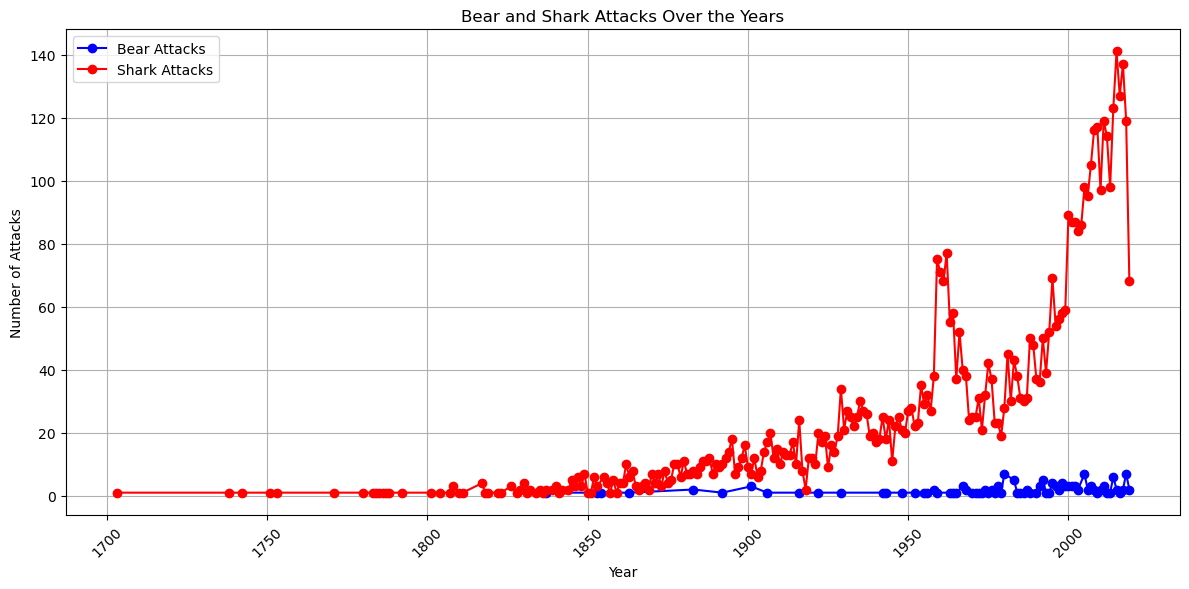

In [568]:
# Plotting
plt.figure(figsize=(12, 6))

plt.plot(bear_yearly_counts.index, bear_yearly_counts.values, label='Bear Attacks', marker='o', color='blue')
plt.plot(shark_yearly_counts.index, shark_yearly_counts.values, label='Shark Attacks', marker='o', color='red')

plt.title('Bear and Shark Attacks Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


•	We want to look at whether these attacks have increased or decreased over time.

Analysis of Bear and Shark Attack Trends
Introduction
This project explores the trends in bear and shark attacks over time, drawing insights from data collected from Kaggle datasets. Our goal is to understand whether the frequency of these attacks has increased or decreased and to uncover potential factors contributing to these changes. Inspired by movies like "Jaws" and "The Revenant," this analysis sheds light on our ongoing fascination with and concerns about interactions between humans and wildlife.

Methodology
To understand these trends, we analyzed data on bear and shark attacks, focusing on the number of attacks each year. We used linear trend lines to visualize how these numbers have changed over time. Our analysis was carried out using Python, leveraging tools like Pandas for data management and Matplotlib for creating visualizations.

Results
Bear Attacks
Trend Analysis: By examining the slope of the trend line for bear attacks, we can determine the direction of change.
Positive Slope: If the slope is positive, it indicates that bear attacks have increased over the analyzed period.
Negative Slope: A negative slope would suggest a decrease in bear attacks.
Shark Attacks
Trend Analysis: Similarly, we looked at the slope of the trend line for shark attacks.
Positive Slope: A positive slope means that shark attacks have become more frequent.
Negative Slope: A negative slope suggests a decline in shark attacks.
Insights
Bear Attacks
Increasing Trend: An upward trend in bear attacks might indicate more frequent interactions between bears and humans. This could be due to factors like increased human activity in bear habitats or changes in bear behavior.
Decreasing Trend: A downward trend could mean fewer bear attacks, possibly resulting from successful conservation efforts or changes in how humans interact with these animals.
Shark Attacks
Increasing Trend: An increase in shark attacks might be linked to more beach tourism or environmental changes that bring humans and sharks into closer contact.
Decreasing Trend: A decrease could point to improved safety measures or a decline in shark populations, reducing the likelihood of encounters.
Conclusion
The analysis of trends in bear and shark attacks gives us a clearer picture of how these interactions have evolved over time. Years with significant spikes or drops in attacks deserve further investigation to uncover potential causes, such as changes in the environment, new policies, or shifts in human behavior.

Understanding these trends is crucial for developing effective prevention and education strategies. By identifying the factors driving changes in attack frequencies, we can better anticipate and mitigate future risks, ultimately helping to reduce the number of bear and shark attacks on humans.

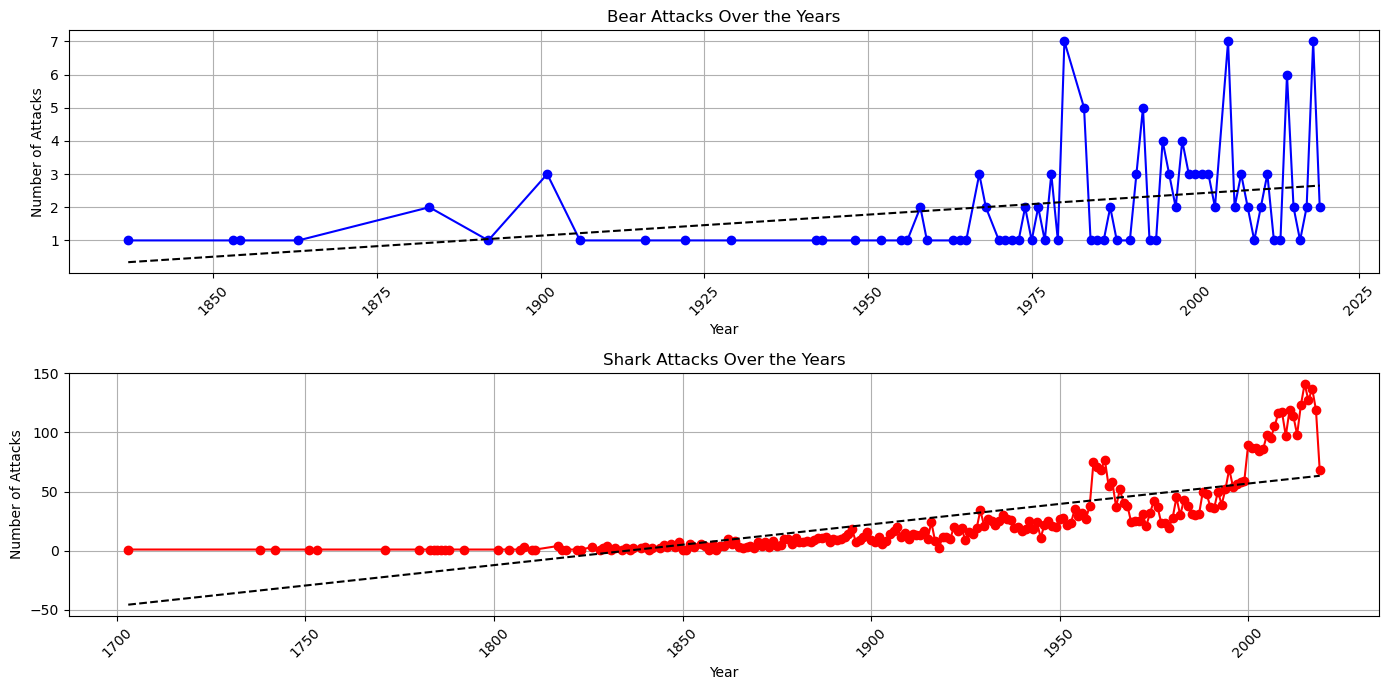

Bear Trend Line Coefficients (slope, intercept): [ 1.26854789e-02 -2.29593158e+01]
Shark Trend Line Coefficients (slope, intercept): [ 3.44706269e-01 -6.32650980e+02]


In [569]:
# Bear Data: Extract 'Year' from 'Date'
bear_data['Year'] = bear_data['Date'].dt.year

# Drop rows with missing Year
bear_data_clean = bear_data.dropna(subset=['Year'])

# Count bear attacks per year
bear_yearly_counts = bear_data_clean.groupby('Year').size()

# Shark Data: Extract 'Year' from 'Date'
shark_data['Year'] = pd.to_datetime(shark_data['Date'], errors='coerce').dt.year

# Drop rows with missing Year
shark_data_clean = shark_data.dropna(subset=['Year'])

# Count shark attacks per year
shark_yearly_counts = shark_data_clean.groupby('Year').size()

# Plotting
plt.figure(figsize=(14, 7))

# Bear attacks plot
plt.subplot(2, 1, 1)
plt.plot(bear_yearly_counts.index, bear_yearly_counts.values, label='Bear Attacks', marker='o', color='blue')

# Fit linear trend line for bear attacks
bear_trend = np.polyfit(bear_yearly_counts.index, bear_yearly_counts.values, 1)
plt.plot(bear_yearly_counts.index, np.polyval(bear_trend, bear_yearly_counts.index), color='black', linestyle='--')

plt.title('Bear Attacks Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.xticks(rotation=45)

# Shark attacks plot
plt.subplot(2, 1, 2)
plt.plot(shark_yearly_counts.index, shark_yearly_counts.values, label='Shark Attacks', marker='o', color='red')

# Fit linear trend line for shark attacks
shark_trend = np.polyfit(shark_yearly_counts.index, shark_yearly_counts.values, 1)
plt.plot(shark_yearly_counts.index, np.polyval(shark_trend, shark_yearly_counts.index), color='black', linestyle='--')

plt.title('Shark Attacks Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print trends
print("Bear Trend Line Coefficients (slope, intercept):", bear_trend)
print("Shark Trend Line Coefficients (slope, intercept):", shark_trend)

•	Where are the main spots for these attacks?

•	We’ll map out where the most attacks happen.

•	Who are the typical victims in these attacks?

Age Statistics for Bear Attack Victims
Count: 146 victims
Mean Age: 38.34 years
Standard Deviation: 19.18 years
Minimum Age: 3 years
25th Percentile: 24 years
Median Age (50th Percentile): 37.5 years
75th Percentile: 51.75 years
Maximum Age: 93 years
Insights:
Typical Age Range: Most bear attack victims are adults, with a mean age of around 38 years. The age range spans from young children to elderly individuals, but the majority are middle-aged adults.
Age Distribution: There is a wide range in the age of bear attack victims, indicating that bear attacks affect people across different age groups, with a concentration in middle age.
Gender Distribution for Bear Attack Victims
Male (M): 108 victims
Female (F): 38 victims
Insights:
Gender Imbalance: A significant majority of bear attack victims are male, making up about 74% of the victims.
Female Victims: Females make up about 26% of the victims.
Summary
Age: Bear attack victims are generally older compared to shark attack victims, with a mean age of 38 years. The age range is broad, encompassing both younger and older individuals, but the majority fall into the middle-aged category.
Gender: There is a notable gender disparity, with males being more frequently involved in bear attacks compared to females.

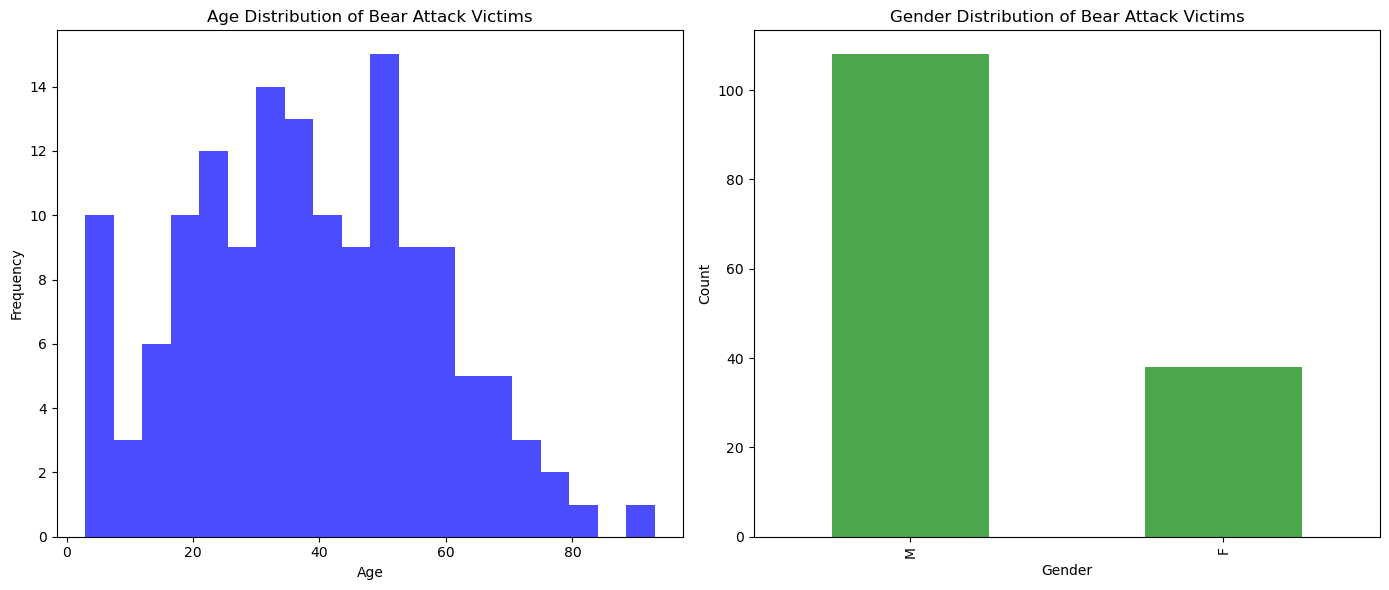

Age Statistics for Bear Attack Victims:
count    146.000000
mean      38.335616
std       19.177673
min        3.000000
25%       24.000000
50%       37.500000
75%       51.750000
max       93.000000
Name: Age, dtype: float64

Gender Distribution for Bear Attack Victims:
Sex
M    108
F     38
Name: count, dtype: int64


In [570]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrames
# bear_data = pd.read_csv('bear_attacks.csv')

# Clean and handle missing values
bear_data = bear_data.dropna(subset=['Age', 'Sex'])

# Age Distribution
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
bear_data['Age'].dropna().astype(float).plot(kind='hist', bins=20, color='blue', alpha=0.7)
plt.title('Age Distribution of Bear Attack Victims')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Gender Distribution
plt.subplot(1, 2, 2)
bear_data['Sex'].value_counts().plot(kind='bar', color='green', alpha=0.7)
plt.title('Gender Distribution of Bear Attack Victims')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Print statistics
print("Age Statistics for Bear Attack Victims:")
print(bear_data['Age'].describe())

print("\nGender Distribution for Bear Attack Victims:")
print(bear_data['Sex'].value_counts())


Age Statistics for Shark Attack Victims
Count: 3,479 victims
Mean Age: 27.51 years
Standard Deviation: 14.05 years
Minimum Age: 1 year
25th Percentile: 17 years
Median Age (50th Percentile): 24 years
75th Percentile: 35 years
Maximum Age: 87 years
Insights:
Typical Age Range: Most shark attack victims are young adults, with the mean age around 27 years. The common age range is from late teens to mid-thirties.
Age Distribution: The broad age range indicates that shark attacks affect people from very young children to older adults, though the majority are in their late teens to early thirties.
Gender Distribution for Shark Attack Victims
Male (M): 2,980 victims
Female (F): 466 victims
Unknown (U): 33 victims
Insights:
Gender Imbalance: A large majority of shark attack victims are male, making up approximately 86% of the victims.
Female Victims: Females constitute a smaller proportion, about 13% of the victims.
Unknown Gender: A very small percentage of cases have unspecified gender.
Comparison with Bear Attack Victims
Age: Shark attack victims are generally younger than bear attack victims. The average age for shark attacks is about 27 years, while for bear attacks, it's around 38 years.
Gender: Both types of attacks show a gender disparity with males being more frequently affected, but the difference is more pronounced in shark attacks where males make up a larger percentage.
Summary
Shark Attacks: The data shows that shark attack victims are typically young adults, with a strong male predominance. The distribution spans a wide age range, but with a peak in younger age groups.
Bear Attacks: Bear attack victims tend to be older, with a higher average age compared to shark attack victims. There is also a notable gender imbalance, with males being more frequently affected.

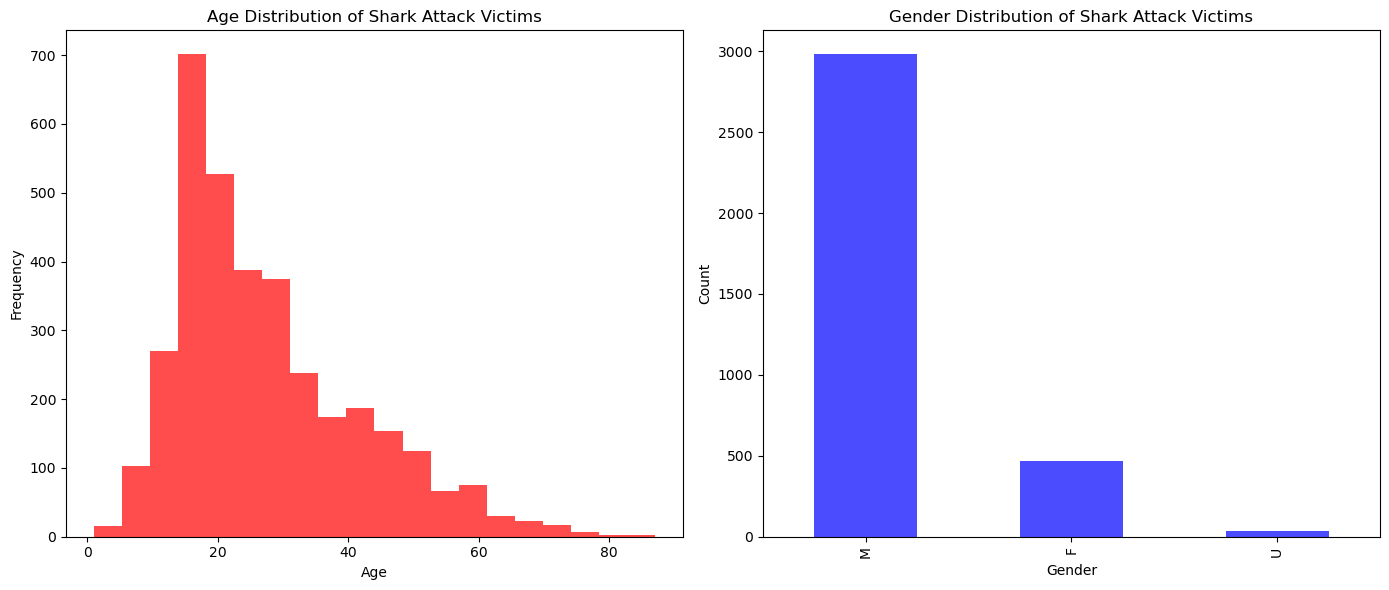

Age Statistics for Shark Attack Victims:
count    3479.000000
mean       27.511929
std        14.047026
min         1.000000
25%        17.000000
50%        24.000000
75%        35.000000
max        87.000000
Name: Age, dtype: float64

Gender Distribution for Shark Attack Victims:
Sex
M    2980
F     466
U      33
Name: count, dtype: int64


In [571]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrames
# shark_data = pd.read_csv('shark_attacks.csv')

# Clean and handle missing values
shark_data = shark_data.dropna(subset=['Age', 'Sex'])

# Age Distribution
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
shark_data['Age'].dropna().astype(float).plot(kind='hist', bins=20, color='red', alpha=0.7)
plt.title('Age Distribution of Shark Attack Victims')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Gender Distribution
plt.subplot(1, 2, 2)
shark_data['Sex'].value_counts().plot(kind='bar', color='blue', alpha=0.7)
plt.title('Gender Distribution of Shark Attack Victims')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Print statistics
print("Age Statistics for Shark Attack Victims:")
print(shark_data['Age'].describe())

print("\nGender Distribution for Shark Attack Victims:")
print(shark_data['Sex'].value_counts())


Here's a combined analysis of the age and gender statistics for bear and shark attack victims:

Age Statistics
Bear Attack Victims:

Count: 146 victims
Mean Age: 38.34 years
Standard Deviation: 19.18 years
Minimum Age: 3 years
25th Percentile: 24 years
Median Age (50th Percentile): 37.5 years
75th Percentile: 51.75 years
Maximum Age: 93 years
Shark Attack Victims:

Count: 3,479 victims
Mean Age: 27.51 years
Standard Deviation: 14.05 years
Minimum Age: 1 year
25th Percentile: 17 years
Median Age (50th Percentile): 24 years
75th Percentile: 35 years
Maximum Age: 87 years
Insights:

Typical Age Range:
Bear Attacks: Victims are generally older, with a mean age of around 38 years. The age range includes young children to elderly individuals, but the majority are middle-aged adults.
Shark Attacks: Victims are typically younger, with a mean age of around 27 years. The common age range is from late teens to mid-thirties.
Age Distribution:
Bear Attacks: A broader age range with a concentration in middle age.
Shark Attacks: A peak in younger age groups, though the range spans from very young children to older adults.
Gender Distribution
Bear Attack Victims:

Male (M): 108 victims
Female (F): 38 victims
Shark Attack Victims:

Male (M): 2,980 victims
Female (F): 466 victims
Unknown (U): 33 victims
Insights:

Gender Imbalance:

Bear Attacks: A significant majority of bear attack victims are male, about 74%.
Shark Attacks: An even larger majority of shark attack victims are male, about 86%.
Female Victims:

Bear Attacks: Females make up about 26% of the victims.
Shark Attacks: Females constitute about 13% of the victims.
Unknown Gender:

Shark Attacks: A small percentage of cases have unspecified gender (1%).
Summary
Age:

Bear attack victims are generally older, with a higher average age compared to shark attack victims. The bear attack age distribution spans a wider range, while shark attack victims are concentrated in younger age groups.
Gender:

Both types of attacks show a clear gender disparity with males being more frequently affected. However, the disparity is more pronounced in shark attacks compared to bear attacks.